In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
# --- Step 2: Load and Prepare the Dataset ---

# Load the Seeds dataset
df = pd.read_csv("Seed_Data.csv")

print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n\n")

print("--- Dataset Information ---")
df.info()


X = df.drop('target', axis=1)
y = df['target']


class_names = np.sort(y.unique())

--- First 5 Rows of the Dataset ---
       A      P       C     LK     WK  A_Coef    LKG  target
0  15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1  14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2  14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3  13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4  16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("--- Data Split ---")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


--- Data Split ---
Training Data Shape: (147, 7)
Testing Data Shape: (63, 7)


In [8]:
# Initialize the Gaussian Naive Bayes classifier
model = GaussianNB()

model.fit(X_train, y_train)

print("Model training complete.")
print("The model has learned the prior probabilities and likelihood distributions.")

Model training complete.
The model has learned the prior probabilities and likelihood distributions.


In [9]:
# --- Step 5: Make Predictions on the Test Set ---
y_pred = model.predict(X_test)

# Posterior probabilities for each class
posterior_probs = model.predict_proba(X_test)


--- Model Evaluation ---
Accuracy: 82.54%
Accuracy represents the proportion of correctly classified samples.


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        21
           1       0.94      0.76      0.84        21
           2       0.83      0.95      0.89        21

    accuracy                           0.83        63
   macro avg       0.83      0.83      0.83        63
weighted avg       0.83      0.83      0.83        63




--- Confusion Matrix ---
Confusion matrix plot saved as 'confusion_matrix_bayes.png'





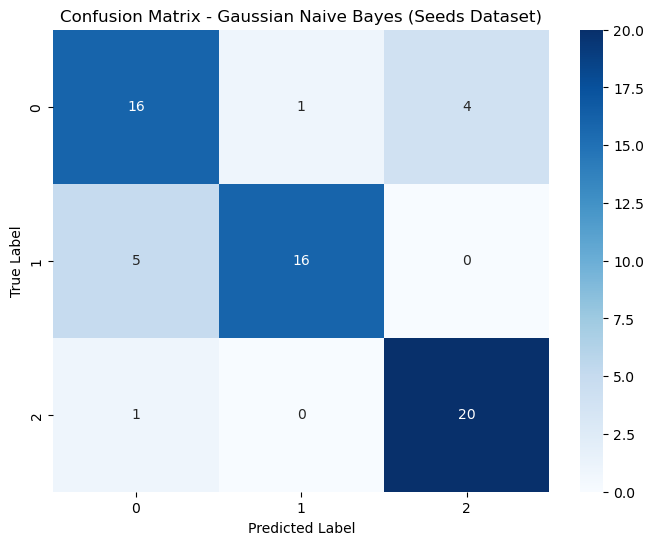

In [11]:
#Step 6: Evaluate the Classifier's Performance

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.2%}")
print("Accuracy represents the proportion of correctly classified samples.\n\n")

# Classification Report
print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in class_names]))
print("\n\n")

# Confusion Matrix
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gaussian Naive Bayes (Seeds Dataset)')

plt.savefig('confusion_matrix_bayes.png')
print("Confusion matrix plot saved as 'confusion_matrix_bayes.png'")
print("\n\n")


In [12]:
# --- Step 7: Interpretation of a Prediction Example ---
print("--- Example of a Single Prediction ---")
sample_index = 0
sample_features = X_test.iloc[sample_index].values
true_class = y_test.iloc[sample_index]
predicted_class = y_pred[sample_index]
probabilities = posterior_probs[sample_index]

print(f"Sample Features: {sample_features}")
print(f"True Class: {true_class}")
print(f"Predicted Class (based on highest posterior probability): {predicted_class}\n")
print("Posterior Probabilities calculated by the model:")
for i, class_name in enumerate(class_names):
    print(f"  P(Class {class_name} | features) = {probabilities[i]:.4f}")

--- Example of a Single Prediction ---
Sample Features: [20.97   17.25    0.8859  6.563   3.991   4.677   6.316 ]
True Class: 1
Predicted Class (based on highest posterior probability): 1

Posterior Probabilities calculated by the model:
  P(Class 0 | features) = 0.0000
  P(Class 1 | features) = 1.0000
  P(Class 2 | features) = 0.0000
